In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [14]:
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.optimizers import *
from tensorflow.keras.losses import *
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
from tensorflow.keras.callbacks import *
from tensorflow.keras.preprocessing.image import *
from tensorflow.keras.utils import *
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import cv2 as cv
from sklearn import metrics

In [9]:
train_df = pd.read_csv('/content/gdrive/MyDrive/asub_dataset/preprocessed_newest/train.csv')
valid_df = pd.read_csv('/content/gdrive/MyDrive/asub_dataset/preprocessed_newest/validation.csv')
test_df = pd.read_csv('/content/gdrive/MyDrive/asub_dataset/preprocessed_newest/test.csv')

Prepare train set.

In [10]:
X_train = []
y_train = []

for i in range(len(train_df)):
    img = cv.imread(train_df['path'][i])

    X_train.append(np.array(img))
    y_train.append(train_df['label'][i])

X_train = np.array(X_train)
y_train = np.array(y_train)

Prepare validation set.

In [11]:
X_validation = []
y_validation = []

for i in range(len(valid_df)):
    img = cv.imread(valid_df['path'][i])

    X_validation.append(np.array(img))
    y_validation.append(valid_df['label'][i])
    
X_validation = np.array(X_validation)
y_validation = np.array(y_validation)

Prepare test set.

In [ ]:
X_test = []
y_test = []

for i in range(len(test_df)):
    img = cv.imread(test_df['path'][i])

    X_validation.append(np.array(img))
    y_validation.append(test_df['label'][i])
    
X_test = np.array(X_test)
y_test = np.array(y_test)

Build the base model.

In [26]:
base_model= ResNet50(input_shape=(200,200,3), weights='imagenet', include_top=False)
model=Sequential()
model.add(base_model)
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dense(256,kernel_initializer='he_uniform'))
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

for layer in base_model.layers:
    layer.trainable = False

model.compile(
    loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy' , 'AUC']
)

model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 flatten_3 (Flatten)         (None, 100352)            0         
                                                                 
 batch_normalization_6 (Batc  (None, 100352)           401408    
 hNormalization)                                                 
                                                                 
 dense_6 (Dense)             (None, 256)               25690368  
                                                                 
 batch_normalization_7 (Batc  (None, 256)              1024      
 hNormalization)                                                 
                                                                 
 activation_3 (Activation)   (None, 256)              

Configure callbacks.

In [27]:
checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath='/content/gdrive/MyDrive/asub_dataset/resnet/best_model',
    monitor='val_accuracy',
    save_best_only=True,
    verbose=1
)

es = EarlyStopping(
    monitor='val_accuracy', 
    mode='max',
    patience=6
)

Train the model.

In [28]:
model.fit(
    x=X_train,
    y=y_train,
    batch_size=16,
    steps_per_epoch=50,
    epochs=30,
    validation_data=(X_validation, y_validation),
    validation_steps=25,
    callbacks=[es, checkpoint_callback],
    verbose=1
)

Epoch 1/30
50/50 [==============================] - ETA: 0s - loss: 0.3697 - accuracy: 0.8413 - auc: 0.9242
Epoch 1: val_accuracy improved from -inf to 0.93500, saving model to /content/gdrive/MyDrive/asub_dataset/resnet/best_model


50/50 [==============================] - 215s 4s/step - loss: 0.3697 - accuracy: 0.8413 - auc: 0.9242 - val_loss: 0.2058 - val_accuracy: 0.9350 - val_auc: 0.9814
Epoch 2/30
50/50 [==============================] - ETA: 0s - loss: 0.1850 - accuracy: 0.9388 - auc: 0.9778
Epoch 2: val_accuracy improved from 0.93500 to 0.96500, saving model to /content/gdrive/MyDrive/asub_dataset/resnet/best_model


50/50 [==============================] - 211s 4s/step - loss: 0.1850 - accuracy: 0.9388 - auc: 0.9778 - val_loss: 0.0991 - val_accuracy: 0.9650 - val_auc: 0.9952
Epoch 3/30
50/50 [==============================] - ETA: 0s - loss: 0.1024 - accuracy: 0.9638 - auc: 0.9949
Epoch 3: val_accuracy improved from 0.96500 to 0.98250, saving model to /content/gdrive/MyDrive/asub_dataset/resnet/best_model


50/50 [==============================] - 216s 4s/step - loss: 0.1024 - accuracy: 0.9638 - auc: 0.9949 - val_loss: 0.0697 - val_accuracy: 0.9825 - val_auc: 0.9950
Epoch 4/30
50/50 [==============================] - ETA: 0s - loss: 0.0622 - accuracy: 0.9812 - auc: 0.9984
Epoch 4: val_accuracy improved from 0.98250 to 0.98500, saving model to /content/gdrive/MyDrive/asub_dataset/resnet/best_model


50/50 [==============================] - 211s 4s/step - loss: 0.0622 - accuracy: 0.9812 - auc: 0.9984 - val_loss: 0.0548 - val_accuracy: 0.9850 - val_auc: 0.9985
Epoch 5/30
50/50 [==============================] - ETA: 0s - loss: 0.0547 - accuracy: 0.9825 - auc: 0.9988
Epoch 5: val_accuracy improved from 0.98500 to 0.98750, saving model to /content/gdrive/MyDrive/asub_dataset/resnet/best_model


50/50 [==============================] - 214s 4s/step - loss: 0.0547 - accuracy: 0.9825 - auc: 0.9988 - val_loss: 0.0465 - val_accuracy: 0.9875 - val_auc: 0.9992
Epoch 6/30
50/50 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9937 - auc: 1.0000
Epoch 6: val_accuracy did not improve from 0.98750
50/50 [==============================] - 187s 4s/step - loss: 0.0274 - accuracy: 0.9937 - auc: 1.0000 - val_loss: 0.0442 - val_accuracy: 0.9775 - val_auc: 0.9989
Epoch 7/30
50/50 [==============================] - ETA: 0s - loss: 0.0307 - accuracy: 0.9937 - auc: 0.9998
Epoch 7: val_accuracy did not improve from 0.98750
50/50 [==============================] - 180s 4s/step - loss: 0.0307 - accuracy: 0.9937 - auc: 0.9998 - val_loss: 0.0339 - val_accuracy: 0.9875 - val_auc: 0.9996
Epoch 8/30
50/50 [==============================] - ETA: 0s - loss: 0.0143 - accuracy: 0.9987 - auc: 1.0000
Epoch 8: val_accuracy did not improve from 0.98750
50/50 [==============================

50/50 [==============================] - 209s 4s/step - loss: 0.0179 - accuracy: 0.9962 - auc: 0.9999 - val_loss: 0.0327 - val_accuracy: 0.9925 - val_auc: 0.9996
Epoch 11/30
50/50 [==============================] - ETA: 0s - loss: 0.0274 - accuracy: 0.9925 - auc: 0.9997
Epoch 11: val_accuracy did not improve from 0.99250
50/50 [==============================] - 189s 4s/step - loss: 0.0274 - accuracy: 0.9925 - auc: 0.9997 - val_loss: 0.0278 - val_accuracy: 0.9925 - val_auc: 0.9998
Epoch 12/30
50/50 [==============================] - ETA: 0s - loss: 0.0229 - accuracy: 0.9962 - auc: 0.9999
Epoch 12: val_accuracy did not improve from 0.99250
50/50 [==============================] - 181s 4s/step - loss: 0.0229 - accuracy: 0.9962 - auc: 0.9999 - val_loss: 0.0272 - val_accuracy: 0.9900 - val_auc: 0.9996
Epoch 13/30
50/50 [==============================] - ETA: 0s - loss: 0.0188 - accuracy: 0.9950 - auc: 0.9999
Epoch 13: val_accuracy did not improve from 0.99250
50/50 [========================

In [29]:
loaded_model = tf.keras.models.load_model('/content/gdrive/MyDrive/asub_dataset/resnet/best_model')

In [31]:
score = loaded_model.evaluate(X_test, y_test, verbose=1)

19/19 [==============================] - 89s 5s/step - loss: 0.1059 - accuracy: 0.9800 - auc: 0.9886


In [32]:
predictions = loaded_model.predict(X_test, verbose=True)
predictions = np.where(predictions > .5, 1, 0)

19/19 [==============================] - 98s 5s/step


In [34]:
print(metrics.classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98       313
           1       0.99      0.97      0.98       287

    accuracy                           0.98       600
   macro avg       0.98      0.98      0.98       600
weighted avg       0.98      0.98      0.98       600



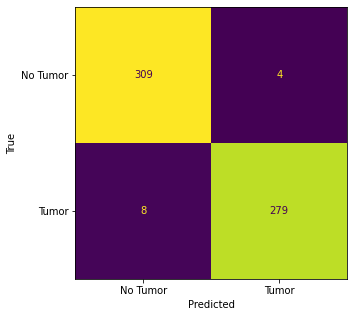

In [35]:
cm = metrics.ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=predictions, colorbar=False, display_labels=['No Tumor', 'Tumor'])
cm.ax_.set(xlabel='Predicted', ylabel='True')
cm.figure_.set_size_inches(5, 5)